![FIT_CTU_LOGO](https://fit.cvut.cz/media-a-pr/corporate-identity/logo-fit-en-cerna.svg)
# FIT ƒåVUT v Praze, [BI-PST](https://courses.fit.cvut.cz/BI-PST), ZS 2021/2022
## Dom√°c√≠ √∫loha - Daniel Bukaƒç, Alexandr Czern√Ω
## Data a parametry
Ze sv√© trojice vyberte reprezentanta. √ölohu odevzdejte cviƒç√≠c√≠mu, ke kter√©mu reprezentant p≈ô√≠slu≈°√≠ podle p≈Øvodn√≠ho p≈ôi≈ôazen√≠ paralelek v Kosu. Parametry √∫lohy spoƒçtƒõte n√°sledovnƒõ:

- K = den narozen√≠ reprezentanta skupiny (1-31),
- L = poƒçet p√≠smen v p≈ô√≠jmen√≠ reprezentanta,
- M = ((K+L)*47)mod(11)+1.

Naƒçtƒõte datov√Ω soubor z R knihovny Sleuth2 podle n√°sleduj√≠c√≠ tabulky:
  
|M|Datov√Ω soubor|Popis|
|:-:|:-------------:|:-----|
|1|case0101|sk√≥re v kreativitƒõ dle typu motivace|
|2|case0102|mzda dle pohlav√≠|
|3|case0201|d√©lka humeru dle p≈ôe≈æit√≠ vrabc≈Ø|
|4|case0202|objem hipokampu dle schizofrenie|
|5|case0301|sr√°≈æky dle o≈°et≈ôen√≠ mrak≈Ø|
|**6**|**case0302**|**koncentrace dioxinu dle vojensk√©ho p≈Øsobi≈°tƒõ**|
|7|case0402|doba ≈ôe≈°en√≠ √∫kolu dle typu v√Ωuky geometrie|
|8|ex0112|krevn√≠ tlak dle diety|
|9|ex0211|p≈ôe≈æit√≠ morƒçat dle typu experimentu|
|10|ex0221|v√°ha dle p≈ôe≈æit√≠ vrabc≈Ø|
|11|ex0222|hladina cholesterolu dle prost≈ôed√≠|  

## √ökoly

1. **(1b)** Naƒçtƒõte datov√Ω soubor a rozdƒõlte sledovanou promƒõnnou na p≈ô√≠slu≈°n√© dvƒõ pozorovan√© skupiny. Struƒçnƒõ popi≈°te data a zkouman√Ω probl√©m. Pro ka≈ædu skupinu zvl√°≈°≈• odhadnƒõte st≈ôedn√≠ hodnotu, rozptyl a medi√°n p≈ô√≠slu≈°n√©ho rozdƒõlen√≠.
2. **(1b)** Pro ka≈ædou skupinu zvl√°≈°≈• odhadnƒõte hustotu a distribuƒçn√≠ funkci pomoc√≠ histogramu a empirick√© distribuƒçn√≠ funkce.
3. **(3b)** Pro ka≈ædou skupinu zvl√°≈°≈• najdƒõte nejbli≈æ≈°√≠ rozdƒõlen√≠: Odhadnƒõte parametry norm√°ln√≠ho, exponenci√°ln√≠ho a rovnomƒõrn√©ho rozdƒõlen√≠. Zaneste p≈ô√≠slu≈°n√© hustoty s odhadnut√Ωmi parametry do graf≈Ø histogramu. Diskutujte, kter√© z rozdƒõlen√≠ odpov√≠d√° pozorovan√Ωm dat≈Øm nejl√©pe.
4. **(1b)** Pro ka≈ædou skupinu zvl√°≈°≈• vygenerujte n√°hodn√Ω v√Ωbƒõr o 100 hodnot√°ch z rozdƒõlen√≠, kter√© jste zvolili jako nejbli≈æ≈°√≠, s parametry odhadnut√Ωmi v p≈ôedchoz√≠m bodƒõ. Porovnejte histogram simulovan√Ωch hodnot s pozorovan√Ωmi daty.
5. **(1b)** Pro ka≈ædou skupinu zvl√°≈°≈• spoƒç√≠tejte oboustrann√Ω 95% konfidenƒçn√≠ interval pro st≈ôedn√≠ hodnotu.
6. **(1b)** Pro ka≈ædou skupinu zvl√°≈°≈• otestujte na hladinƒõ v√Ωznamnosti 5 % hypot√©zu, zda je st≈ôedn√≠ hodnota rovn√° hodnotƒõ K (parametr √∫lohy), proti oboustrann√© alternativƒõ. M≈Ø≈æete pou≈æ√≠t buƒè v√Ωsledek z p≈ôede≈°l√©ho bodu, nebo v√Ωstup z p≈ô√≠slu≈°n√© vestavƒõn√© funkce va≈°eho softwaru.
7. **(2b)** Na hladinƒõ v√Ωznamnosti 5 % otestujte, jestli maj√≠ pozorovan√© skupiny stejnou st≈ôedn√≠ hodnotu. Typ testu a alternativy stanovte tak, aby va≈°e volba nejl√©pe korespondovala s povahou zkouman√©ho probl√©mu.

### Import pot≈ôebn√Ωch knihoven a urƒçen√≠ parametr≈Ø √∫lohy

In [1]:
### import required libraries

import math
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

from scipy.stats import (
    norm,
    expon,
    uniform,
    ttest_1samp,
    ttest_ind,
    t as students_t_distr
)

Podle n√°sleduj√≠c√≠ho v√Ωpoƒçtu jsme zvolili datovou sadu **case0302**:

In [2]:
K = 15
L = len("Bukac")
M = ((K + L) * 47) % (11) + 1
print(">>> K = {}, L = {}, M = {}".format(K, L, M))

>>> K = 15, L = 5, M = 6


### √ökol 1
(1b) **Naƒçtƒõte datov√Ω soubor a rozdƒõlte sledovanou promƒõnnou na p≈ô√≠slu≈°n√© dvƒõ pozorovan√© skupiny. Struƒçnƒõ popi≈°te data a zkouman√Ω probl√©m. Pro ka≈ædu skupinu zvl√°≈°≈• odhadnƒõte st≈ôedn√≠ hodnotu, rozptyl a medi√°n p≈ô√≠slu≈°n√©ho rozdƒõlen√≠.**

#### Popis datov√© sady
Datov√° sada obsahuje data z v√Ωzkumu Arm√°dy Spojen√Ωch st√°t≈Ø americk√Ωch, kter√Ω probƒõhl v roce 1987. C√≠lem v√Ωzkumu bylo zmƒõ≈ôit koncentraci [TCDD](https://en.wikipedia.org/wiki/2,3,7,8-Tetrachlorodibenzodioxin) v krevn√≠ch vzorc√≠ch v√°leƒçn√Ωch veter√°n≈Ø. TCDD je karcinogenn√≠ [dioxin](https://en.wikipedia.org/wiki/Dioxins_and_dioxin-like_compounds), jen≈æ byl souƒç√°st√≠ herbicidu [Agent Orange](https://en.wikipedia.org/wiki/Agent_Orange), kter√Ω Arm√°d√° Spojen√Ωch st√°t≈Ø vyu≈æ√≠vala k ƒçi≈°tƒõn√≠ √∫kryt≈Ø v d≈æungli bƒõhem [v√°lky ve Vietnamu](https://en.wikipedia.org/wiki/Vietnam_War) mezi lety 1962 a≈æ 1970.  
  
Datov√° sada obsahuje celkem 743 z√°znam≈Ø, z toho 646 z√°znam≈Ø se t√Ωka voj√°k≈Ø, kte≈ô√≠ ve Vietnamu slou≈æili a naopak 97 z√°znam≈Ø voj√°k≈Ø, kte≈ô√≠ ve Vietnamu nebyli. Datov√° sada je v csv form√°tu. Data jsou rozdƒõlena do dvou sloupc≈Ø, prvn√≠ sloupec `Dioxin` ud√°v√° koncentraci TCDD v krevn√≠m vzorku dan√©ho voj√°ka, druh√Ω sloupec `Veteran` nab√Ωv√° pouze dvou hodnot, hodnota `Vietnam` respektive `Other` a indikuje, zda dan√Ω voj√°k slou≈æil ve Vietnamu, ƒçi nikoliv. V√Ωhodou je, ≈æe data u≈æ jsou oƒçi≈°tƒõna, neobsahuj√≠ nedefinovan√© hodnoty a z na≈°√≠ strany tak nevy≈æaduj√≠ ≈æ√°dn√© p≈ôedzpracov√°n√≠. 

#### Naƒçten√≠ datov√© sady
K naƒçten√≠ datov√© sady jsme vyu≈æili knihovnu [pandas](https://pandas.pydata.org/docs/index.html) a jej√≠ datovou strukturu [DataFrame](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html). D√°le jsme sadu dle zad√°n√≠ rozdƒõlili na dvƒõ skupiny. Dataframe pojemnovan√Ω `data_vietnam` obsahuje z√°znamy veter√°n≈Ø, kte≈ô√≠ slou≈æili ve v√°lce ve Vietnamu a analogicky dataframe `data_other` obsahuje z√°znamy veter√°n≈Ø, kte≈ô√≠ ve Vietnamu neslou≈æili.

In [3]:
### load and split dataset

data = pd.read_csv("./data.csv")
data_vietnam = data[data.Veteran == "Vietnam"]
data_other = data[~(data.Veteran == "Vietnam")]

### preview data
display(data)

Dioxin  Veteran
0         0  Vietnam
1         0  Vietnam
2         0  Vietnam
3         0  Vietnam
4         0  Vietnam
..      ...      ...
738       9    Other
739       9    Other
740      10    Other
741      11    Other
742      15    Other

[743 rows x 2 columns]

#### Odhad parametr≈Ø jednotliv√Ωch skupin

K odhadu parametr≈Ø jsme vyu≈æili statistick√© metody pandas dataframu, konkr√©tnƒõ metodu [mean](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mean.html) pro odhad st≈ôedn√≠ hodnoty pomoc√≠ v√Ωbƒõrov√©ho pr≈Ømƒõru, metodu [var](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.var.html) pro odhad rozptylu pomoc√≠ v√Ωbƒõrov√©ho rozptylu a metodu [median](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.median.html) pro z√≠sk√°n√≠ medi√°nu.

#### Vietnam group

In [4]:
### vietnam group - estimate expected value, variance and median of given distributions

vietnam_expected_value = data_vietnam.Dioxin.mean()
vietnam_variance = data_vietnam.Dioxin.var()
vietnam_median = data_vietnam.Dioxin.median()

print("Vietnam group estimated parameters:")
print(">>> Expected value:", vietnam_expected_value)
print(">>> Variance:", vietnam_variance)
print(">>> Median:", vietnam_median)

Vietnam group estimated parameters:
>>> Expected value: 4.260061919504644
>>> Variance: 6.98342573259414
>>> Median: 4.0


#### Other group

In [5]:
### other group - estimate expected value, variance and median of given distributions

other_expected_value = data_other.Dioxin.mean()
other_variance = data_other.Dioxin.var()
other_median = data_other.Dioxin.median()

print("Other group estimated parameters:")
print(">>> Expected value:", other_expected_value)
print(">>> Variance:", other_variance)
print(">>> Median:", other_median)

Other group estimated parameters:
>>> Expected value: 4.185567010309279
>>> Variance: 5.298539518900344
>>> Median: 4.0


### √ökol 2
(1b) **Pro ka≈ædou skupinu zvl√°≈°≈• odhadnƒõte hustotu a distribuƒçn√≠ funkci pomoc√≠ histogramu a empirick√© distribuƒçn√≠ funkce.**

Pro vykreslen√≠ graf≈Ø jsme vyu≈æili vizualizaƒçn√≠ knihovnu [seaborn](https://seaborn.pydata.org/). Poƒçet p≈ôihr√°dek u histogram≈Ø jsme odhadli experiment√°lnƒõ.

#### Vietnam group

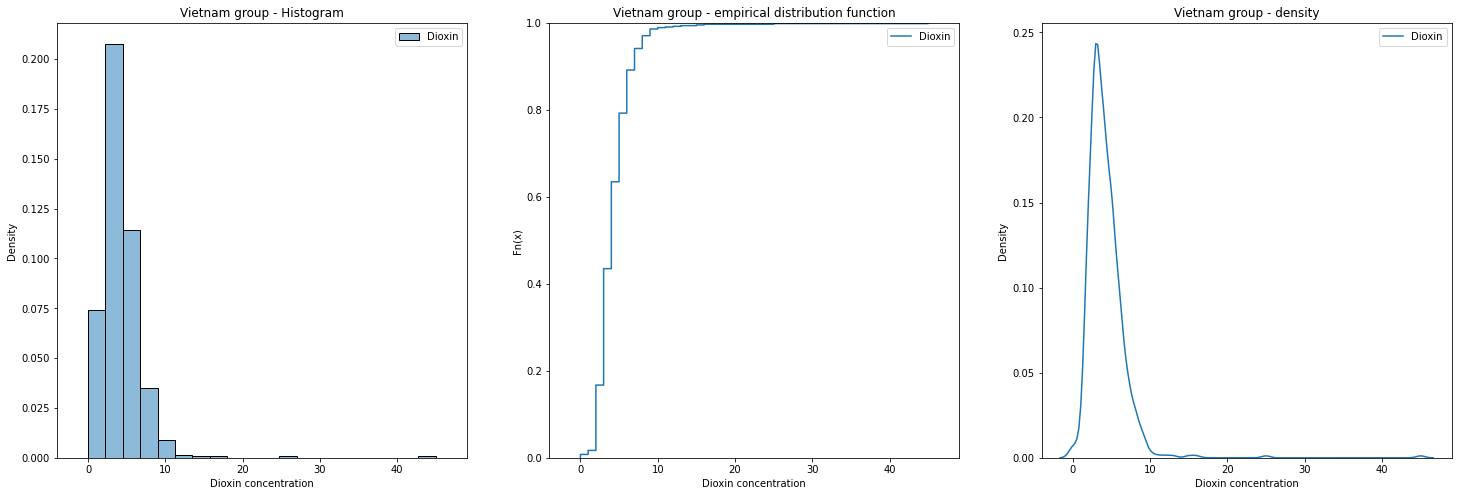

In [6]:
### vietnam group - histogram, distribution function, density

fig, (ax1, ax2, ax3) = plt.subplots(
    ncols=3,
    sharex=True,
    figsize=(25, 8)
)
ax1 = sb.histplot(
    data=data_vietnam,
    bins=20,
    stat="density",
    ax=ax1
)
ax2 = sb.ecdfplot(
    data=data_vietnam,
    ax=ax2
)
ax3 = sb.kdeplot(
    data=data_vietnam,
    bw_adjust=.75,
    ax=ax3
)
ax1 = ax1.set(
    title="Vietnam group - Histogram",
    xlabel="Dioxin concentration"
)
ax2 = ax2.set(
    title="Vietnam group - empirical distribution function",
    xlabel="Dioxin concentration",
    ylabel="Fn(x)"
)
ax3 = ax3.set(
    title="Vietnam group - density",
    xlabel="Dioxin concentration"
)

#### Other group

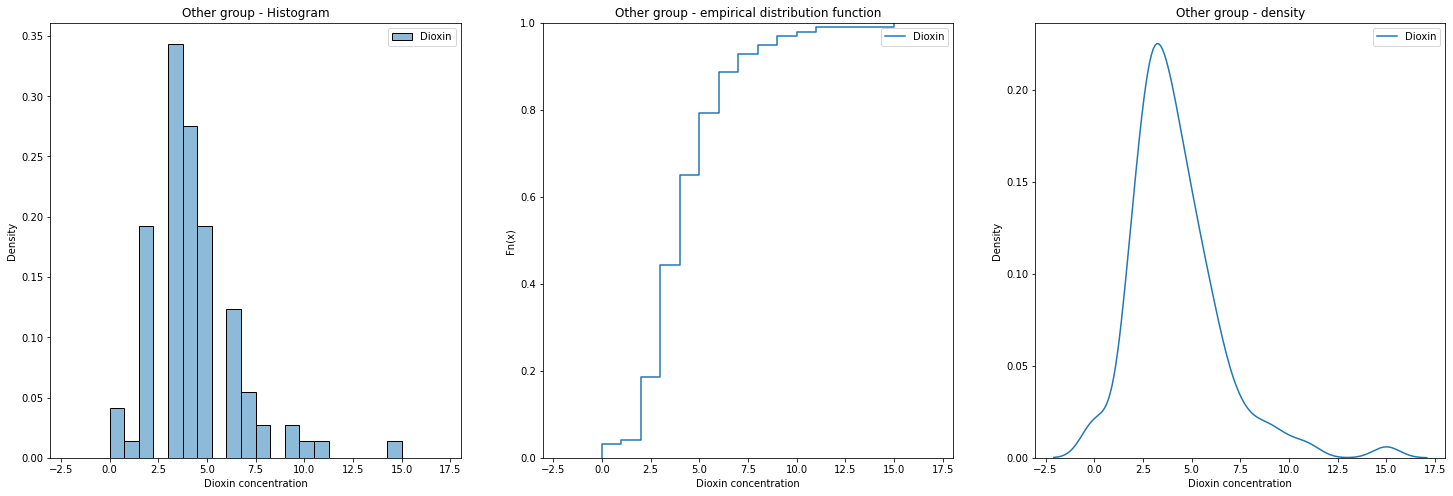

In [7]:
### other group - histogram, distribution function, density

fig, (ax1, ax2, ax3) = plt.subplots(
    ncols=3,
    sharex=True,
    figsize=(25, 8)
)
ax1 = sb.histplot(
    data=data_other,
    bins=20,
    stat="density",
    ax=ax1
)
ax2 = sb.ecdfplot(
    data=data_other,
    ax=ax2
)
ax3 = sb.kdeplot(
    data=data_other,
    bw_adjust=.75,
    ax=ax3
)
ax1 = ax1.set(
    title="Other group - Histogram",
    xlabel="Dioxin concentration"
)
ax2 = ax2.set(
    title="Other group - empirical distribution function",
    xlabel="Dioxin concentration",
    ylabel="Fn(x)"
)
ax3 = ax3.set(
    title="Other group - density",
    xlabel="Dioxin concentration"
)

### √ökol 3
(3b) **Pro ka≈ædou skupinu zvl√°≈°≈• najdƒõte nejbli≈æ≈°√≠ rozdƒõlen√≠: Odhadnƒõte parametry norm√°ln√≠ho, exponenci√°ln√≠ho a rovnomƒõrn√©ho rozdƒõlen√≠. Zaneste p≈ô√≠slu≈°n√© hustoty s odhadnut√Ωmi parametry do graf≈Ø histogramu. Diskutujte, kter√© z rozdƒõlen√≠ odpov√≠d√° pozorovan√Ωm dat≈Øm nejl√©pe.**

#### Odhad parametr≈Ø
Pro odhad parametr≈Ø jednotliv√Ωch rozdƒõlen√≠ jsme vyu≈æili knihovnu [scipy](https://scipy.org/) a p≈ô√≠slu≈°n√© t≈ô√≠dy pro dan√° rozdƒõlen√≠. Konkr√©tnƒõ vyu≈æ√≠v√°me metodu [fit](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_continuous.fit.html#scipy.stats.rv_continuous.fit), kter√° se sna≈æ√≠ naj√≠t nejp≈ôesnƒõj≈°√≠ odhad dan√©ho rozdƒõlen√≠ pro poskytnut√° data a vr√°t√≠ n√°m p≈ô√≠slu≈°n√© parametry dan√©ho rozdƒõlen√≠. K odhadu tƒõchto parametr≈Ø m≈Ø≈æeme vyu≈æ√≠t buƒèto metodu MLE (Maximum Likelihood Estimate), nebo MM (Method of Moments), p≈ôiƒçem≈æ my jsme pro na≈°e ≈ôe≈°en√≠ zvolili metodu MLE.

#### Vietnam group

In [8]:
### vietnam group - estimated distribution parameters

viet_norm_distr_expected_value, viet_norm_distr_std_deviance = norm.fit(data_vietnam.Dioxin, method="MLE")
viet_expon_distr_expected_value, viet_expon_distr_std_deviance = expon.fit(data_vietnam.Dioxin, floc=0, method="MLE")
viet_uniform_distr_a, viet_uniform_distr_b = uniform.fit(data_vietnam.Dioxin, method="MLE")

print("Vietnam group - estimated distribution parameters")
print(">>> Normal distribution -> ùùÅ = {}, ùõî = {}".format(
    viet_norm_distr_expected_value,
    viet_norm_distr_std_deviance
))
print(">>> Exponential distribution -> ùõå = {}".format(
    1 / viet_expon_distr_std_deviance
))
print(">>> Uniform distribution -> ùêö = {}, ùêõ = {}".format(
    viet_uniform_distr_a,
    viet_uniform_distr_a + viet_uniform_distr_b
))

Vietnam group - estimated distribution parameters
>>> Normal distribution -> ùùÅ = 4.260061919504644, ùõî = 2.6405710511255207
>>> Exponential distribution -> ùõå = 0.23473837209302323
>>> Uniform distribution -> ùêö = 0.0, ùêõ = 45.0


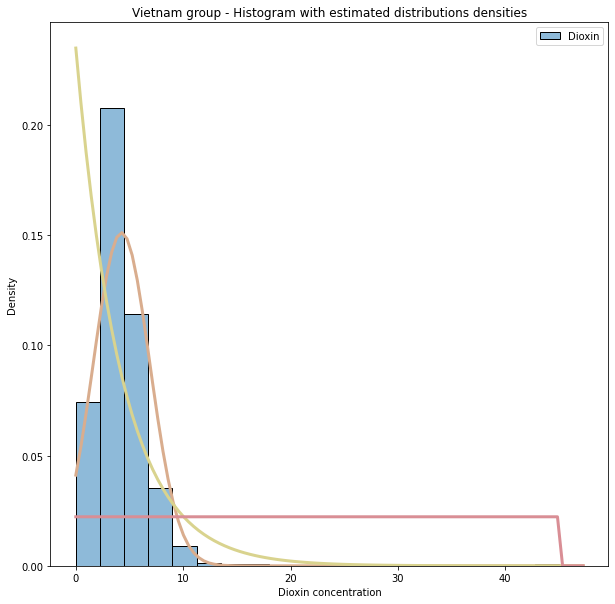

In [9]:
### vietnam group - distributions density visualization

fig, ax = plt.subplots(figsize=(10, 10))
ax = sb.histplot(
    data=data_vietnam,
    bins=20,
    stat="density",
    kde=False
)
ax = ax.set(
    title="Vietnam group - Histogram with estimated distributions densities",
    xlabel="Dioxin concentration"
)
_, xmax = plt.xlim()
x_axis_values = np.linspace(0, xmax, 100)
norm_distr_pdf = norm.pdf(
    x_axis_values, 
    viet_norm_distr_expected_value, 
    viet_norm_distr_std_deviance
)
expon_distr_pdf = expon.pdf(
    x_axis_values,
    viet_expon_distr_expected_value,
    viet_expon_distr_std_deviance
)
uniform_distr_pdf = uniform.pdf(
    x_axis_values,
    viet_uniform_distr_a,
    viet_uniform_distr_b
)
sb.lineplot(
    x=x_axis_values,
    y=norm_distr_pdf,
    color="#d9ad8e",
    linewidth=3
)
sb.lineplot(
    x=x_axis_values,
    y=expon_distr_pdf,
    color="#d9d38e",
    linewidth=3
)
sb.lineplot(
    x=x_axis_values,
    y=uniform_distr_pdf,
    color="#d98e95",
    linewidth=3
)
plt.show()

#### Diskuze

Odhadli jsme parametry pro jednotliv√° rozdƒõlen√≠ a p≈ô√≠slu≈°n√© hustoty jsme zanesli do grafu histogramu. Z v√Ω≈°e uveden√©ho grafu je na prvn√≠ pohled z≈ôejm√©, ≈æe uniformn√≠ rozdƒõlen√≠ na≈°im pozorovan√Ωm dat≈Øm neodpov√≠d√°, jeliko≈æ data ani zdaleka nejsou na dan√©m intervalu rozlo≈æena rovnomƒõrnƒõ. Zb√Ωv√° tedy rozhodnout mezi exponenci√°ln√≠m a norm√°ln√≠m rozdƒõlen√≠m. Po kr√°tk√©m zkoum√°n√≠ jsme do≈°li k z√°vƒõru, ≈æe na≈°e pozorovan√° data nejv√≠ce odpov√≠daj√≠ norm√°ln√≠mu rozdƒõlen√≠, exponenci√°ln√≠ rozdƒõlen√≠ jsme vylouƒçili z toho d≈Øvodu, ≈æe z≈ôejmƒõ v prvn√≠m sloupci na≈°eho histogramu je v√Ωraznƒõ m√©nƒõ dat ne≈æ ve sloupci vpravo od nƒõj a to v situaci kdy pozorovan√Ωch dat m√°me relativn√≠ dostatek (643 z√°znam≈Ø), co≈æ neodpov√≠d√° exponenci√°ln√≠mu rozdƒõlen√≠, a naopak data relativnƒõ dob≈ôe odpov√≠daj√≠ norm√°ln√≠mu rozdƒõlen√≠ a proto jsme norm√°ln√≠ rozdƒõlen√≠ zvolili za nejbli≈æ≈°√≠ odhad pro na≈°e pozorovan√° data.

#### Other group

In [10]:
### other group - estimated distribution parameters

other_norm_distr_expected_value, other_norm_distr_std_deviance = norm.fit(data_other.Dioxin, method="MLE")
other_expon_distr_expected_value, other_expon_distr_std_deviance = expon.fit(data_other.Dioxin, method="MLE")
other_uniform_distr_a, other_uniform_distr_b = uniform.fit(data_other.Dioxin, method="MLE") 

print("Other group - estimated distribution parameters")
print(">>> Normal distribution -> ùùÅ = {}, ùõî = {}".format(
    other_norm_distr_expected_value,
    other_norm_distr_std_deviance
))
print(">>> Exponential distribution -> ùõå = {}".format(
    1 / other_expon_distr_std_deviance
))
print(">>> Uniform distribution -> ùêö = {}, ùêõ = {}".format(
    other_uniform_distr_a,
    other_uniform_distr_a + other_uniform_distr_b
))

Other group - estimated distribution parameters
>>> Normal distribution -> ùùÅ = 4.185567010309279, ùõî = 2.2899596940009213
>>> Exponential distribution -> ùõå = 0.23891625615763545
>>> Uniform distribution -> ùêö = 0.0, ùêõ = 15.0


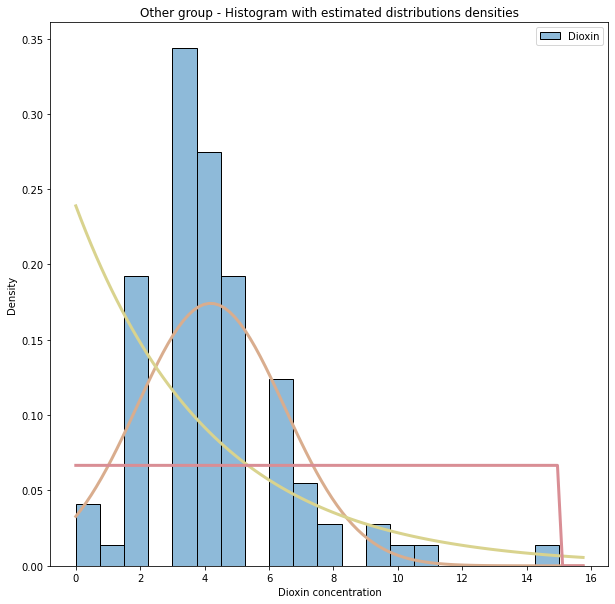

In [11]:
### other group - distributions density visualization

fig, ax = plt.subplots(figsize=(10, 10))
ax = sb.histplot(
    data=data_other,
    bins=20,
    stat="density",
    kde=False
)
ax = ax.set(
    title="Other group - Histogram with estimated distributions densities",
    xlabel="Dioxin concentration"
)
_, xmax = plt.xlim()
x_axis_values = np.linspace(0, xmax, 100)
norm_distr_pdf = norm.pdf(
    x_axis_values,
    other_norm_distr_expected_value,
    other_norm_distr_std_deviance
)
expon_distr_pdf = expon.pdf(
    x_axis_values,
    other_expon_distr_expected_value,
    other_expon_distr_std_deviance
)
uniform_distr_pdf = uniform.pdf(
    x_axis_values,
    other_uniform_distr_a,
    other_uniform_distr_b
)
sb.lineplot(
    x=x_axis_values,
    y=norm_distr_pdf,
    color="#d9ad8e",
    linewidth=3
)
sb.lineplot(
    x=x_axis_values,
    y=expon_distr_pdf,
    color="#d9d38e",
    linewidth=3
)
sb.lineplot(
    x=x_axis_values,
    y=uniform_distr_pdf,
    color="#d98e95",
    linewidth=3
)
plt.show()

#### Diskuze

Odhadli jsme parametry pro jednotliv√° rozdƒõlen√≠ a p≈ô√≠slu≈°n√© hustoty jsme zanesli do grafu histogramu. Na z√°kladƒõ v√Ω≈°e uveden√© vizualizace jsme i zde odhadli, ≈æe pozorovan√° data nejv√≠ce odpov√≠daj√≠ norm√°ln√≠mu rozdƒõlen√≠, zde je nav√≠c mnohem z≈ôejmƒõj≈°√≠ a o nejbli≈æ≈°√≠m rozdƒõlen√≠ nem√°me pochybnosti.

### √ökol 4
(1b) **Pro ka≈ædou skupinu zvl√°≈°≈• vygenerujte n√°hodn√Ω v√Ωbƒõr o 100 hodnot√°ch z rozdƒõlen√≠, kter√© jste zvolili jako nejbli≈æ≈°√≠, s parametry odhadnut√Ωmi v p≈ôedchoz√≠m bodƒõ. Porovnejte histogram simulovan√Ωch hodnot s pozorovan√Ωmi daty.**

#### Generov√°n√≠ n√°hodn√©ho v√Ωbƒõru
Jeliko≈æ jsme v p≈ôedchoz√≠m √∫kolu pro obƒõ skupiny vybrali jako nejbli≈æ≈°√≠ rozdƒõlen√≠ norm√°ln√≠ rozdƒõlen√≠, pou≈æili jsme pro generov√°n√≠ n√°hodn√©ho v√Ωbƒõru pro obƒõ skupiny metodu [random.normal](https://numpy.org/doc/1.21/reference/random/generated/numpy.random.normal.html) z knihovny [NumPy](https://numpy.org/doc/1.21/index.html#). K tomu n√°m staƒçily v p≈ôedchoz√≠m √∫kolu odhadnut√© parametry st≈ôedn√≠ hodnota a standardn√≠ odchylka pozorovan√Ωch dat.

#### Vietnam group

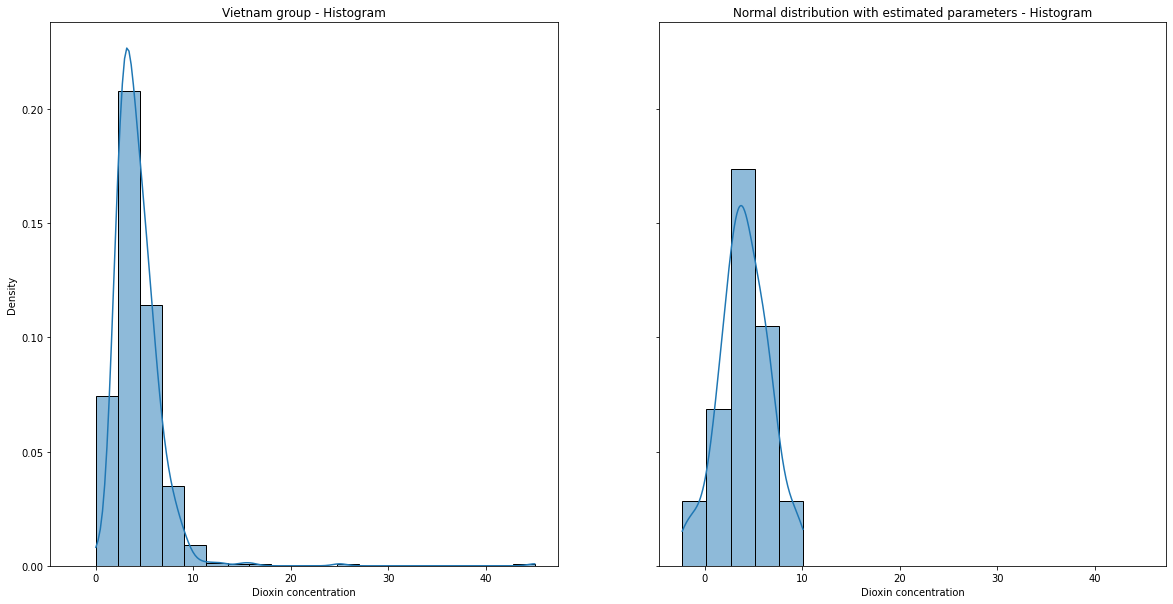

In [12]:
### vietnam group - data comparison

data_vietnam_simulated = np.random.normal(
    loc=viet_norm_distr_expected_value,
    scale=viet_norm_distr_std_deviance,
    size=100
)

fig, (ax1, ax2) = plt.subplots(
    ncols=2,
    sharex=True,
    sharey=True,
    figsize=(20, 10)
)
ax1 = sb.histplot(
    data_vietnam,
    bins=20,
    stat="density",
    kde=True,
    ax=ax1,
    legend=False
)
ax2 = sb.histplot(
    data_vietnam_simulated,
    bins=5,
    stat="density",
    kde=True,
    ax=ax2
)
ax1 = ax1.set(
    title="Vietnam group - Histogram",
    xlabel="Dioxin concentration"
)
ax2 = ax2.set(
    title="Normal distribution with estimated parameters - Histogram",
    xlabel="Dioxin concentration"
)

#### Diskuze

Generovan√Ω vzorek je pomƒõrnƒõ mal√Ω, proto takto odhadnut√Ω vzorek dat neodpov√≠d√° pozorovan√Ωm dat≈Øm √∫plnƒõ p≈ôesnƒõ, co≈æ je ov≈°em vzhledem k velikosti obou vzork≈Ø oƒçek√°vateln√©. Zaj√≠mav√© m≈Ø≈æe b√Ωt to, ≈æe v pozorovan√Ωch datech jsou i velmi odlehl√© body (tzv. outliers), kter√© maj√≠ vzhledem k p≈ôedpokl√°dan√©mu norm√°ln√≠mu rozdƒõlen√≠ a odhadnut√Ωm parametr≈Øm extr√©mnƒõ n√≠zkou pravdƒõpodobnost v√Ωskytu a proto je oƒçek√°vateln√©, ≈æe mezi n√°hodnƒõ generovan√Ωmi body tyto odlehl√© body nebudou.

#### Other group

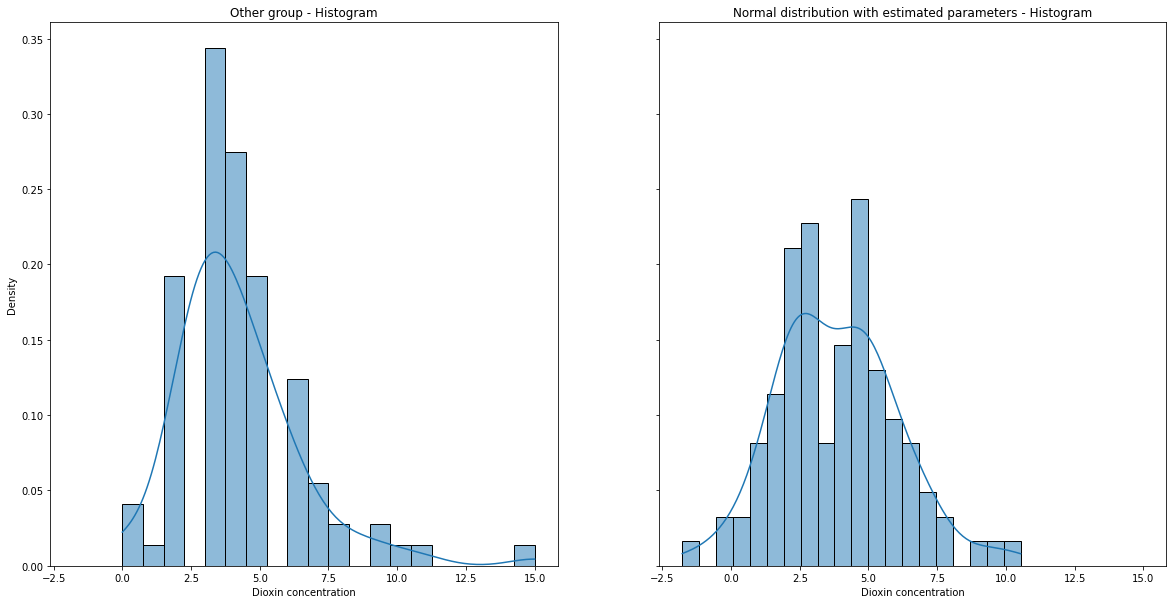

In [13]:
### other group - data comparison

data_other_simulated = np.random.normal(
    loc=other_norm_distr_expected_value,
    scale=other_norm_distr_std_deviance,
    size=100
)

fig, (ax1, ax2) = plt.subplots(
    ncols=2,
    sharex=True,
    sharey=True,
    figsize=(20, 10)
)
ax1 = sb.histplot(
    data_other,
    bins=20,
    stat="density",
    kde=True,
    ax=ax1,
    legend=False
)
ax2 = sb.histplot(
    data_other_simulated,
    bins=20,
    stat="density",
    kde=True,
    ax=ax2
)
ax1 = ax1.set(
    title="Other group - Histogram",
    xlabel="Dioxin concentration"
)
ax2 = ax2.set(
    title="Normal distribution with estimated parameters - Histogram",
    xlabel="Dioxin concentration"
)

#### Diskuze

Oba vzorky dat jsou pomƒõrnƒõ dost mal√©, proto hodnƒõ z√°le≈æ√≠ jak se n√°m zrovna poda≈ô√≠ n√°hodnƒõ generovanou skupinu 100 prvk≈Ø vytvo≈ôit, pro lep≈°√≠ srovn√°n√≠ bychom i zde pot≈ôebovali rozs√°hlej≈°√≠ vzorek dat.

### √ökol 5
(1b) **Pro ka≈ædou skupinu zvl√°≈°≈• spoƒç√≠tejte oboustrann√Ω 95% konfidenƒçn√≠ interval pro st≈ôedn√≠ hodnotu.**

Oboustrann√Ω intervalov√Ω odhad pro st≈ôedn√≠ hodnotu norm√°ln√≠ho rozdƒõlen√≠ *(to jsme odhadli v √∫kolu 3)* s nezn√°m√Ωm rozptylem nalezneme pomoc√≠ kritick√Ωch hodnot [Studentova t-rozdƒõlen√≠](https://en.wikipedia.org/wiki/Student%27s_t-distribution). Vyu≈æijeme n√°sleduj√≠c√≠ vzorec z p≈ôedn√°≈°ky:  
  
$$\large (L, U) = (\overline{X}_{n} - t_{\frac{\alpha}{2}, n-1} \frac{s_{n}}{\sqrt{n}}, \overline{X}_{n} + t_{\frac{\alpha}{2}, n-1} \frac{s_{n}}{\sqrt{n}})$$
  
Chceme 95 % interval, tedy:
$$\large 1 - \alpha = 0.95, $$
$$\large \alpha = 0.05, $$
$$\large \frac{\alpha}{2} = 0.025 $$  
Kritickou hodnotu $ t_{0.025, n-1} $ nalezneme pomoc√≠ funkce [students_t_distr.ppf](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html) z bal√≠ƒçku SciPy, kde za n-1 dosad√≠me p≈ô√≠slu≈°n√Ω stupe≈à volnosti. D√°le spoƒç√≠t√°me hodnoty v√Ωbƒõrov√©ho pr≈Ømƒõru a odmocninu z v√Ωbƒõrov√©ho rozptylu. Po dosazen√≠ do vzorce dostaneme p≈ô√≠slu≈°n√Ω oboustrann√Ω konfidenƒçn√≠ interval.

#### Vietnam group

- $ \overline{X}_{n} = 4.260061919504644 $
- $ s_{n} = 2.642617212650016 $
- $ n - 1 =  645 $
- $ \sqrt{n} = 25.39685019840059 $
- $ t_{\frac{\alpha}{2}, n-1} = 1.9636487184107028 $

In [14]:
### vietnam group - 95 % confidence interval for expected value

mean = data_vietnam.Dioxin.mean()
std = data_vietnam.Dioxin.std()
count = data_vietnam.Dioxin.count()
t = students_t_distr.ppf(q=1-0.025, df=count-1)
L_viet = mean - t * std / math.sqrt(count)
U_viet = mean + t * std / math.sqrt(count)
print(">>> (L, U) = ({}, {})".format(L_viet, U_viet))

>>> (L, U) = (4.05589668169332, 4.464227157315968)


#### Other group

- $ \overline{X}_{n} = 4.185567010309279 $
- $ s_{n} = 2.301855668564027 $
- $ n - 1 =  96 $
- $ \sqrt{n} = 9.848857801796104 $
- $ t_{\frac{\alpha}{2}, n-1} = 1.984984311431769 $

In [15]:
### other group - 95 % confidence interval for expected value

mean = data_other.Dioxin.mean()
std = data_other.Dioxin.std()
count = data_other.Dioxin.count()
t = students_t_distr.ppf(q=1-0.025, df=count-1)
L_other = mean - t * std / math.sqrt(count)
U_other = mean + t * std / math.sqrt(count)
print(">>> (L, U) = ({}, {})".format(L_other, U_other))

>>> (L, U) = (3.721640382345717, 4.64949363827284)


### √ökol 6

(1b) **Pro ka≈ædou skupinu zvl√°≈°≈• otestujte na hladinƒõ v√Ωznamnosti 5 % hypot√©zu, zda je st≈ôedn√≠ hodnota rovn√° hodnotƒõ K (parametr √∫lohy), proti oboustrann√© alternativƒõ. M≈Ø≈æete pou≈æ√≠t buƒè v√Ωsledek z p≈ôede≈°l√©ho bodu, nebo v√Ωstup z p≈ô√≠slu≈°n√© vestavƒõn√© funkce va≈°eho softwaru.**

Testujeme hypot√©zu o st≈ôedn√≠ hodnotƒõ norm√°ln√≠ho rozdƒõlen√≠ proti oboustrann√© alternativƒõ, tedy  
  
$$ \large H_{0} : \mu = K = 15 \hspace{0.5cm} proti \hspace{0.5cm} H_{A} : \mu \neq K = 15 $$  
  
Pot≈ôebujeme tedy oboustrann√Ω $ (1 - \alpha) \% $ interval spolehlivosti. Jeliko≈æ st√°le nezn√°me rozptyl dan√©ho rozdƒõlen√≠ a 95% interval spolehlivosti jsme si spoƒç√≠tali v minul√©m √∫kolu pomoc√≠ Studentova t-rozdƒõlen√≠, m≈Ø≈æeme ho nyn√≠ vyu≈æ√≠t.

#### Vietnam group

Interval spolehlivosti vypoƒçten√Ω v minul√©m √∫kolu pro tuto skupinu  
  
$$\large (L, U) = (4.05589668169332, 4.464227157315968) $$  
  
Testovanou hodnotu  
  
$$\large \mu_{0} = K = 15 $$  
  
interval nepokr√Ωv√° a tedy $ H_{0} $ na hladinƒõ v√Ωznamnosti 5 % zam√≠tneme a p≈ôijeme alternativn√≠ hypot√©zu $ H_{A} $ .

In [16]:
### vietnam_group - testing hypothesis for expected value

K = 15
viet_t_statistic, viet_p_value = ttest_1samp(
    data_vietnam.Dioxin,
    K,
    alternative="two-sided"
)
print(">>> t-statistic = {}, p-value = {}".format(viet_t_statistic, viet_p_value))

>>> t-statistic = -103.29606486224891, p-value = 0.0


Jen pro kontrolu jsme je≈°tƒõ vyzkou≈°eli funkci [ttest_1samp](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_1samp.html) opƒõt z knihovny SciPy pro otestov√°n√≠ na≈°√≠ hypot√©zy, kter√° spoƒç√≠t√° oboustrann√Ω T-test pro nulovou hypot√©zu, ≈æe st≈ôedn√≠ hodnota poskytnut√Ωch dat je rovna zadan√© hodnotƒõ. Zaj√≠m√° n√°s druh√° n√°vratov√° hodnota `pvalue`, co≈æ je velmi zjednodu≈°enƒõ pravdƒõpodobnost, ≈æe udƒõl√°me chybu v p≈ô√≠padƒõ zam√≠tnut√≠ nulov√© hypot√©zy. Jeliko≈æ `pvalue` je v tomto p≈ô√≠padƒõ men≈°√≠ ne≈æ zadan√° hladina v√Ωznamnosti (0.05) tak nulovou hypot√©zu zam√≠tneme a p≈ôijemem alternativn√≠ hypot√©zu, co≈æ je oƒçek√°van√Ω v√Ωsledek. 

#### Other group

Interval spolehlivosti vypoƒçten√Ω v minul√©m √∫kolu pro tuto skupinu  
  
$$\large (L, U) = (3.721640382345717, 4.64949363827284) $$  
  
Testovanou hodnotu  
  
$$\large \mu_{0} = K = 15 $$  
  
interval nepokr√Ωv√° a tedy $ H_{0} $ na hladinƒõ v√Ωznamnosti 5 % zam√≠tneme a p≈ôijeme alternativn√≠ hypot√©zu $ H_{A} $ .

In [17]:
### other group - testing hypothesis for expected value

K = 15
other_t_statistic, other_p_value = ttest_1samp(
    data_other.Dioxin,
    K,
    alternative="two-sided"
)
print(">>> t-statistic = {}, p-value = {}".format(other_t_statistic, other_p_value))

>>> t-statistic = -46.27128198222826, p-value = 1.9220186618312877e-67


I zde je v√Ωsledek `pvalue` men≈°√≠ ne≈æ zadan√° hladina v√Ωznamnosti a proto jsme opƒõt ve prospƒõch alternativn√≠ hypot√©zy nulovou hypot√©zu zam√≠tnuli.

### √ökol 7
(2b) **Na hladinƒõ v√Ωznamnosti 5 % otestujte, jestli maj√≠ pozorovan√© skupiny stejnou st≈ôedn√≠ hodnotu. Typ testu a alternativy stanovte tak, aby va≈°e volba nejl√©pe korespondovala s povahou zkouman√©ho probl√©mu.**

Chceme porovnat st≈ôedn√≠ hodnotu obou skupin dat. √ökolem je zjistit, zda jsou st≈ôedn√≠ hodnoty obou skupin stejn√©, nebo se v√Ωraznƒõ li≈°√≠. Oznaƒç√≠me st≈ôedn√≠ hodnotu skupiny veter√°nu z Vietnamu jako $ \mu_{0} $ a st≈ôedn√≠ hodnotu skupiny veter√°n≈Ø, kte≈ô√≠ ve Vietnamu nebyli jako $ \mu_{1} $. V p≈ôedchoz√≠ch √∫kolech jsme odhadli, ≈æe skupiny jsou norm√°lnƒõ rozdƒõlen√© a nyn√≠ nav√≠c p≈ôedpokl√°d√°me, ≈æe jsou skupiny vz√°jemnƒõ nez√°visl√© (co≈æ v tomto p≈ô√≠padƒõ d√°v√° smysl, jeliko≈æ u obou skupin p≈ôedpokl√°d√°me, ≈æe koncentrace Dioxinu v jejich krevn√≠ch vzorc√≠ch nepoch√°z√≠ ze stejn√©ho zdroje). Pou≈æijeme dvouv√Ωbƒõrov√Ω test. Testujeme tedy nulovou hypot√©zu proti oboustrann√© alternativƒõ.  
  
$$\large H_{0} : \mu_{0} = \mu_{1} \hspace{0.5cm} proti \hspace{0.5cm} H_{A} : \mu_{0} \neq \mu_{a} $$  
  
Jeliko≈æ rozptyl obou rozdƒõlen√≠ nezn√°me a pou≈æ√≠v√°me pouze jeho odhad pomoc√≠ v√Ωbƒõrov√©ho rozptylu, mus√≠me pou≈æ√≠t variantu dvouv√Ωbƒõrov√©ho testu, kde se rovnost rozptyl≈Ø dan√Ωch rozdƒõlen√≠ nep≈ôedpokl√°d√°. Pro otestov√°n√≠ pou≈æijeme funkci [ttest_ind](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html) z bal√≠ƒçku SciPy. Proto≈æe rozptyly rozdƒõlen√≠ se tedy rovnat nemusej√≠ nastav√≠me parametr `equal_var=False` a knihovn√≠ funkce tak provede [Welch's ttest](https://en.wikipedia.org/wiki/Welch%27s_t-test).

In [18]:
#### vietnam and other group - testing hypothesis for expected value equality

t_statistic, p_value = ttest_ind(
    data_vietnam.Dioxin,
    data_other.Dioxin,
    equal_var=False,
    alternative="two-sided"
)
print(">>> t-statistic = {}, p-value = {}".format(t_statistic, p_value))

>>> t-statistic = 0.2912216209327345, p-value = 0.771322407561552


V√Ωsledn√° hodnota `pvalue` je vƒõt≈°√≠ ne≈æ zadan√° hladina v√Ωznamnosti, proto na dan√© hladinƒõ v√Ωznamnosti $ \alpha = 0.05 $ nulovou hypot√©zu nezam√≠t√°me, jeliko≈æ pro to nem√°me dostatek d≈Økaz≈Ø a tedy st≈ôedn√≠ hodnoty obou skupin se na dan√© hladinƒõ v√Ωznamnosti rovnaj√≠.